In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

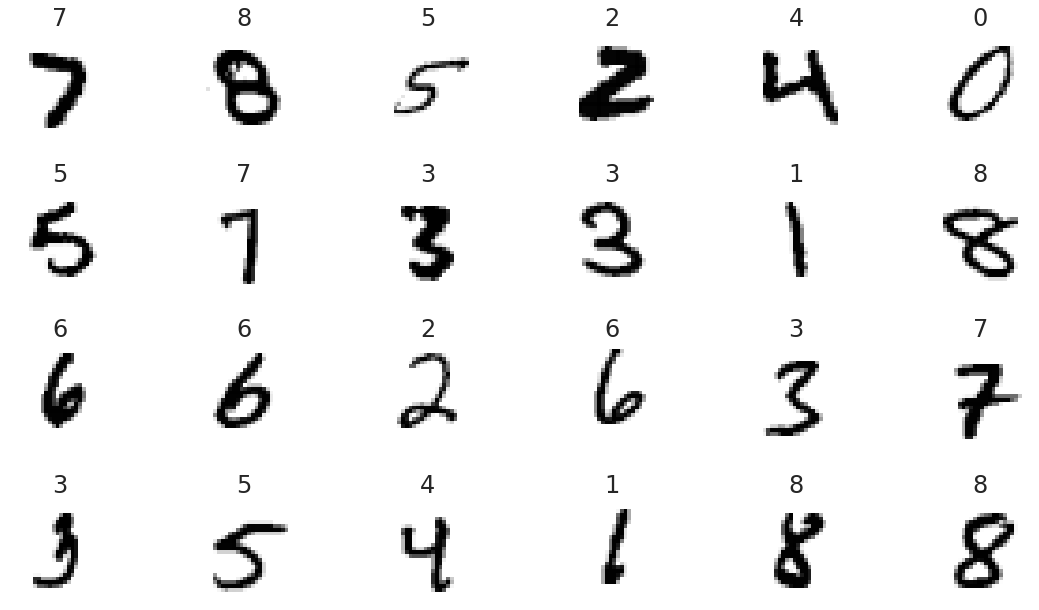

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [15]:
X_test.shape

(10000, 28, 28, 1)

In [16]:
X_train = X_train.astype('float32') / 255

In [17]:
X_test = X_test.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(10000, 10)

In [24]:
from tensorflow.keras.models import Sequential 

In [25]:
cnn = Sequential()

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Flatten())

In [32]:
cnn.add(Dense(units=128, activation='relu'))

In [33]:
cnn.add(Dense(units=10, activation='softmax'))

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

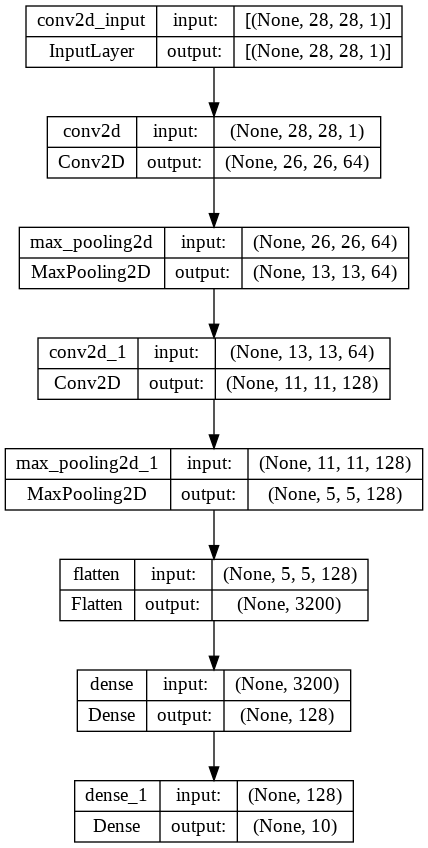

In [35]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [36]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 125s 147ms/step - loss: 0.1478 - accuracy: 0.9548 - val_loss: 0.0527 - val_accuracy: 0.9857
Epoch 2/5
844/844 [==============================] - 124s 147ms/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0357 - val_accuracy: 0.9902
Epoch 3/5
844/844 [==============================] - 124s 146ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0357 - val_accuracy: 0.9893
Epoch 4/5
844/844 [==============================] - 122s 144ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0386 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 122s 145ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0320 - val_accuracy: 0.9918


In [38]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0273 - accuracy: 0.9912


In [39]:
loss

0.027261747047305107

In [40]:
accuracy

0.9911999702453613

In [41]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 7s 22ms/step


In [42]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [43]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000642%
1: 0.0000005623%
2: 0.0000210741%
3: 0.0000478521%
4: 0.0000000232%
5: 0.0000006992%
6: 0.0000000000%
7: 99.9998509884%
8: 0.0000133765%
9: 0.0000547114%


In [44]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [45]:
len(incorrect_predictions)

88

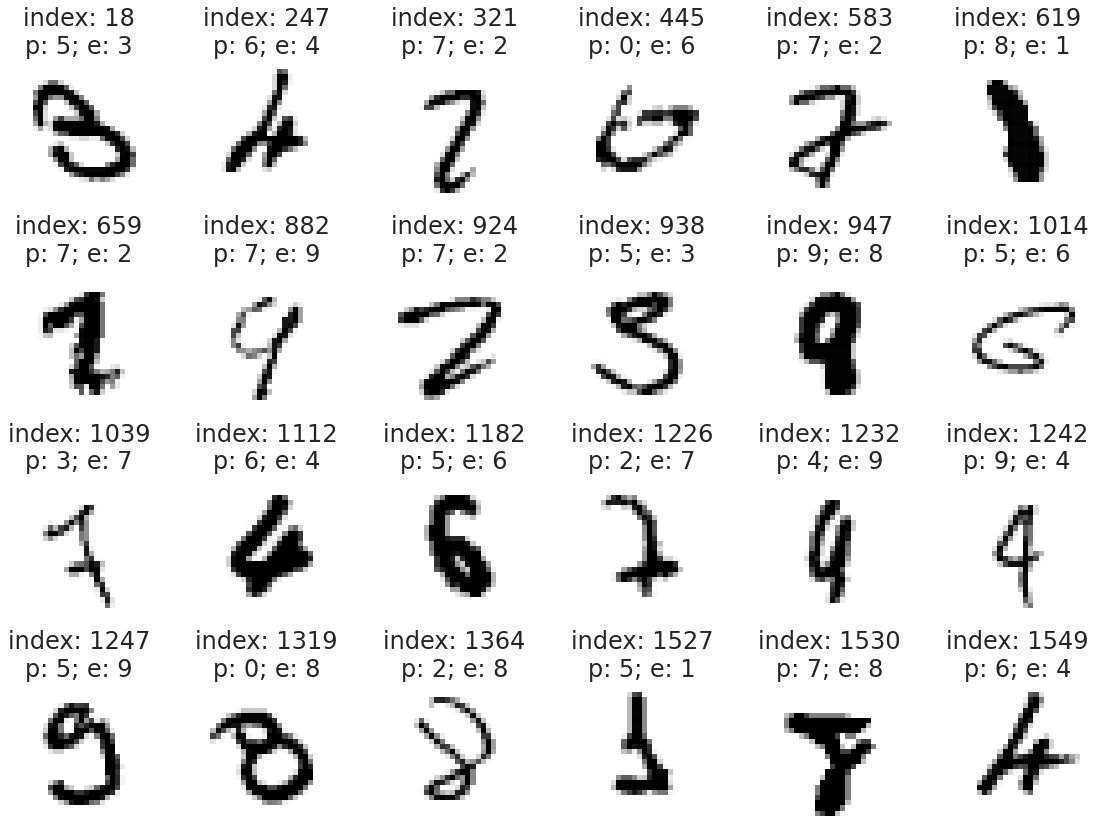

In [46]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [47]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [48]:
display_probabilities(predictions[495])

0: 1.5945974737%
1: 0.0000001371%
2: 0.0103180479%
3: 0.0020612255%
4: 0.0001177331%
5: 0.0838986132%
6: 1.8434984609%
7: 0.0000000094%
8: 96.4254140854%
9: 0.0400951132%


In [49]:
display_probabilities(predictions[583])

0: 0.0000319325%
1: 0.0000632413%
2: 29.6827942133%
3: 0.4144887906%
4: 0.0000030883%
5: 0.0000068509%
6: 0.0000000005%
7: 69.7562038898%
8: 0.1463921857%
9: 0.0000137158%


In [50]:
display_probabilities(predictions[625])

0: 0.0004643379%
1: 0.0000102264%
2: 0.0012849630%
3: 0.0000000004%
4: 2.7870465070%
5: 0.0000008675%
6: 97.2109436989%
7: 0.0000000035%
8: 0.0000036209%
9: 0.0002404331%


In [51]:
cnn.save('mnist_cnn.h5')